In [2]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import SEACells

In [4]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

This notebook requires three data files

Link to lymph_node_lymphoma_14k_raw_feature_bc_matrix.h5:
https://drive.google.com/file/d/10TH9PU1_sFCDiLcAmUgb4jNfbkWm8B2n/view?usp=sharing

Link to atac_metacells.h5ad:
https://drive.google.com/file/d/1qJgMW4CHCBj1pMSSqlzFMPSKzdbew1Gl/view?usp=share_link

Link to new_rna.h5ad:
https://drive.google.com/file/d/1dQKAoJxU-sipguIM60uw9kSbWM9PqS6N/view?usp=sharing

In [ ]:
#reading in the raw unfiltered RNA data and the preprocessed ATAC data after SEACell creation
rna_ad = sc.read_10x_h5('lymph_node_lymphoma_14k_raw_feature_bc_matrix.h5')
atac_ad = sc.read('atac_metacells.h5ad')

/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
rna_ad

AnnData object with n_obs × n_vars = 718370 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:
atac_ad

AnnData object with n_obs × n_vars = 11926 × 242409
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'Clusters', 'ReadsInPeaks', 'FRIP', 'leiden', 'SEACell'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'
    uns: 'GeneScoresColums', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'GeneScores', 'X_svd', 'X_umap'
    obsp: 'connectivities', 'distances'

#Subsetting RNA

In [ ]:
atac_ad.obs.index = atac_ad.obs.index.str.replace('BCL#', '')
atac_ad.obs_names

Index(['CAGAACCGTTCACTGT-1', 'ATTCATGAGATGCCTG-1', 'TTGACATCAGCGCTTG-1',
       'CCTTGCGTCCTTCGTA-1', 'CCTGCTCCAGCAAGTG-1', 'CCGCACACAGCCTGCA-1',
       'GGTTTGTAGCCGCAAC-1', 'CACCTGTTCTTAGTCT-1', 'AGGCGGATCATGTCAA-1',
       'GCGATTAGTCCTTTAA-1',
       ...
       'ATTGCACAGTTATCTC-1', 'GGCGCTAGTTAGCAGC-1', 'AGCGGACCAGACAAAC-1',
       'AGTTGTCAGGTTACGT-1', 'AAGGTCAAGCACTTGG-1', 'GATTTGCAGGCTCATG-1',
       'ACCCGGTAGGACAATG-1', 'CTAACCTGTGGGTACT-1', 'CCAGACTCAAGTCGCT-1',
       'GTAAGCTTCTTGTCTG-1'],
      dtype='object', name='index', length=11926)

In [ ]:
rna_ad.obs_names

Index(['AAACAGCCAAACAACA-1', 'AAACAGCCAAACATAG-1', 'AAACAGCCAAACCCTA-1',
       'AAACAGCCAAACCTAT-1', 'AAACAGCCAAACCTTG-1', 'AAACAGCCAAACGCGA-1',
       'AAACAGCCAAACGGGC-1', 'AAACAGCCAAACTAAG-1', 'AAACAGCCAAACTCAT-1',
       'AAACAGCCAAACTGCC-1',
       ...
       'TTTGTTGGTTTGCGCC-1', 'TTTGTTGGTTTGCTGT-1', 'TTTGTTGGTTTGGCGG-1',
       'TTTGTTGGTTTGGCTT-1', 'TTTGTTGGTTTGGGCG-1', 'TTTGTTGGTTTGGGTA-1',
       'TTTGTTGGTTTGGTTC-1', 'TTTGTTGGTTTGTCTA-1', 'TTTGTTGGTTTGTGGA-1',
       'TTTGTTGGTTTGTTGC-1'],
      dtype='object', length=718370)

In [ ]:
rna_ad = rna_ad[atac_ad.obs_names]

In [ ]:
rna_ad

View of AnnData object with n_obs × n_vars = 11926 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

#RNA Preprocessing

/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


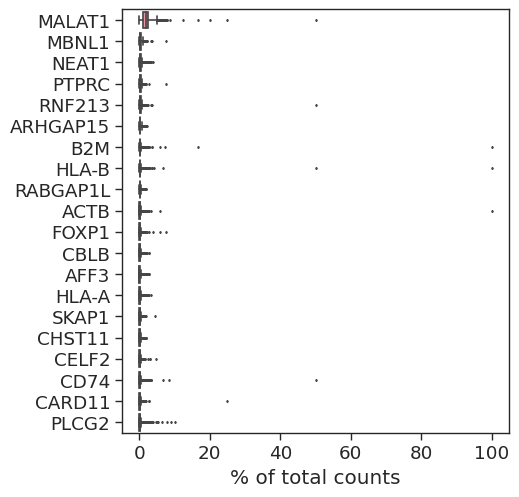

In [ ]:
sc.pl.highest_expr_genes(rna_ad, n_top=20,)

In [ ]:
sc.pp.filter_cells(rna_ad, min_genes=0)
sc.pp.filter_genes(rna_ad, min_cells=3)

/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
rna_ad

AnnData object with n_obs × n_vars = 11926 × 26815
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [ ]:
rna_ad.var['mt'] = rna_ad.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna_ad, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
rna_ad.var_names_make_unique()
rna_ad

AnnData object with n_obs × n_vars = 11926 × 26815
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

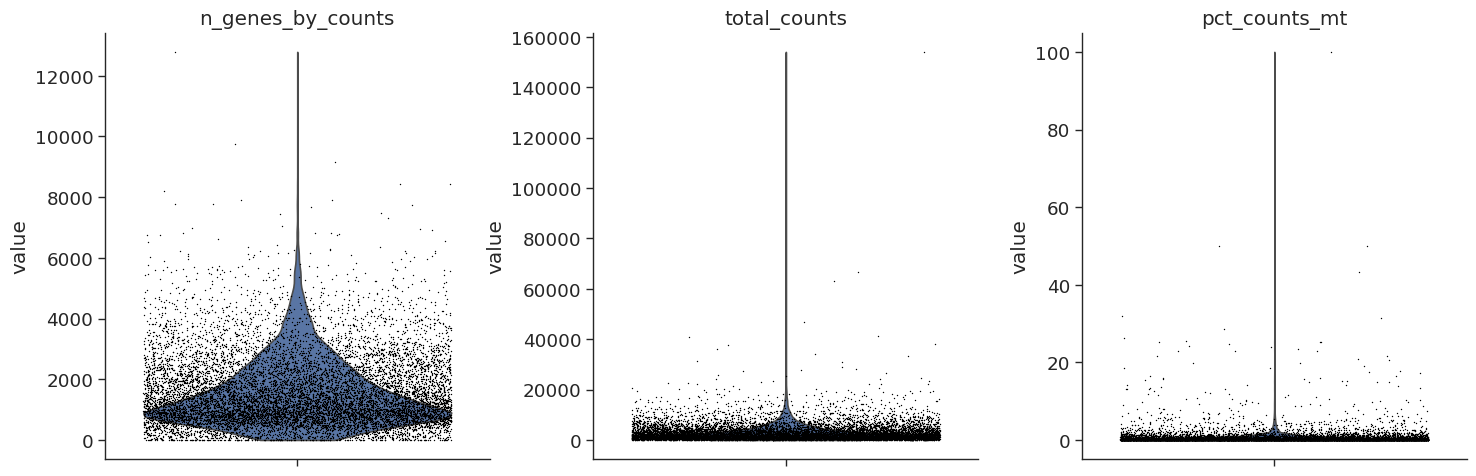

In [ ]:
sc.pl.violin(rna_ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

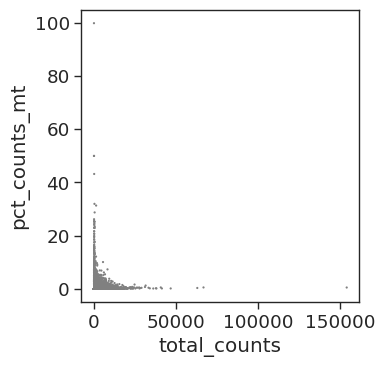

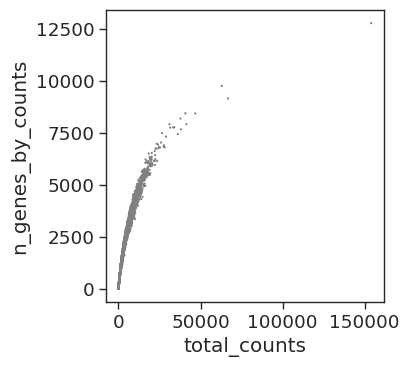

In [ ]:
sc.pl.scatter(rna_ad, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(rna_ad, x='total_counts', y='n_genes_by_counts')

/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


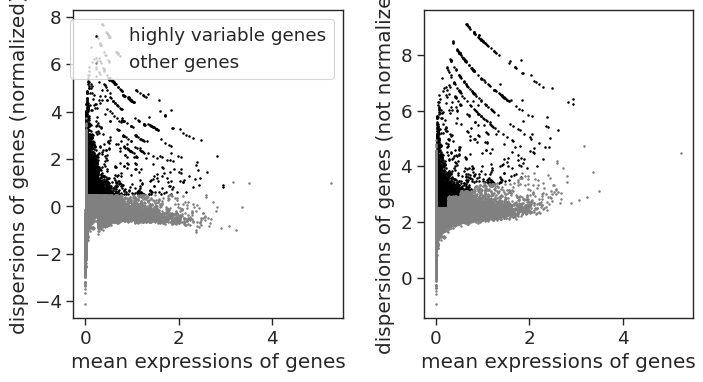

In [ ]:
sc.pp.normalize_total(rna_ad, target_sum=1e4)
sc.pp.log1p(rna_ad)
sc.pp.highly_variable_genes(rna_ad, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(rna_ad)

In [ ]:
rna_ad.raw = rna_ad

In [ ]:
rna_ad = rna_ad[:, rna_ad.var.highly_variable]
sc.pp.regress_out(rna_ad, ['total_counts'])
sc.pp.scale(rna_ad, max_value=10)

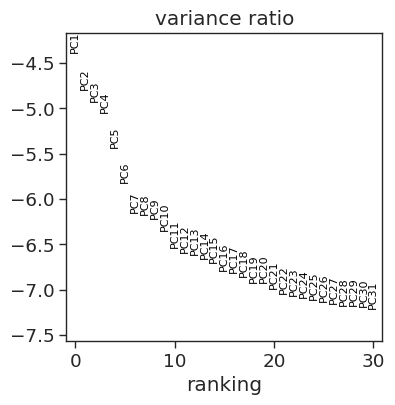

In [ ]:
sc.tl.pca(rna_ad, svd_solver='arpack')
sc.pl.pca_variance_ratio(rna_ad, log=True)

In [ ]:
sc.pp.neighbors(rna_ad, n_neighbors=10, n_pcs=40)
sc.tl.umap(rna_ad)

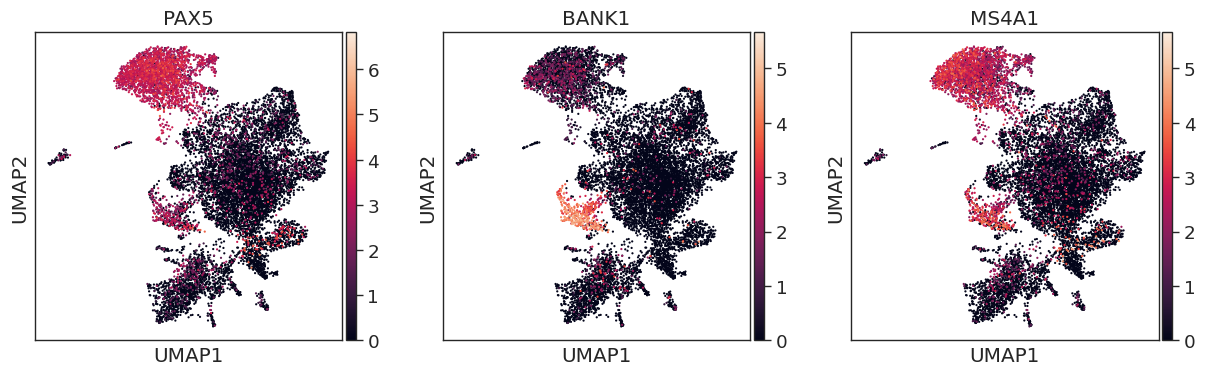

In [ ]:
sc.pl.umap(rna_ad, color=['PAX5', 'BANK1', 'MS4A1'])

In [ ]:
sc.tl.leiden(rna_ad, resolution = 0.1, key_added = "leiden_0.1")
sc.tl.leiden(rna_ad, resolution = 0.15, key_added = "leiden_0.15")
sc.tl.leiden(rna_ad, resolution = 0.2, key_added = "leiden_0.2")
sc.tl.leiden(rna_ad, resolution = 0.3, key_added = "leiden_0.3")

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


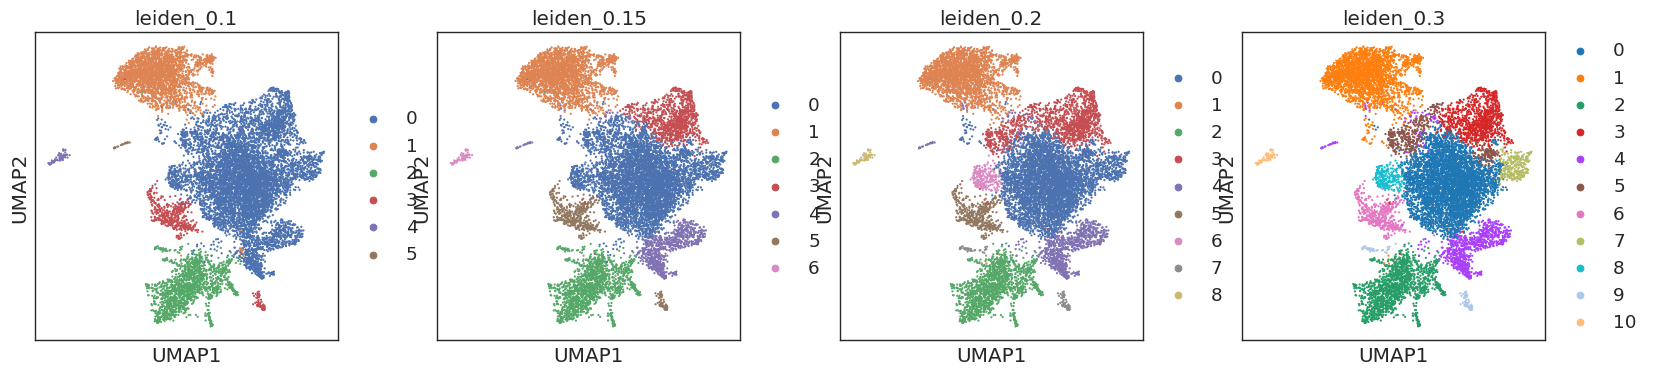

In [ ]:
sc.pl.umap(rna_ad, color=['leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.3'])

#Annotating Cell Types based on gene expression

In [ ]:
marker_genes_dict = {
    'B-cell': ['MS4A1', 'CD19', 'FOXP1'],
    'Tumor-B': ['CD40', 'PAX5'],
    'Healthy-B': ['CD40', 'BANK1'],
    'Cytotoxic-T': ['CD8A'],
    'Monocyte' : ['CD14', 'FCGR3A', 'LYZ'],
    'Dendritic': ['CST3'],
    'NK': ['GNLY', 'NKG7'],
    'Fibroblast': ['COL1A1'],
    'Naive-T': ['IL7R'],
    'Regulatory-T': ['CD4'],
    'BCL': ['BCL11A']
}

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Tumor-B, Healthy-B, etc.


/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


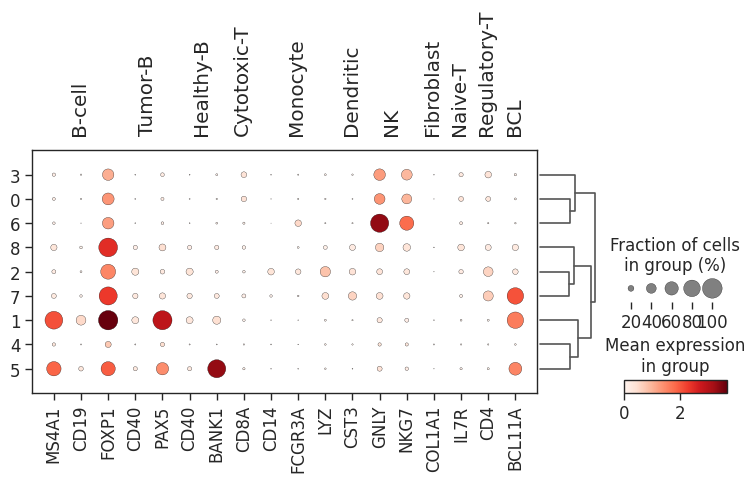

In [ ]:
sc.pl.dotplot(rna_ad, marker_genes_dict, 'leiden_0.2', dendrogram=True)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


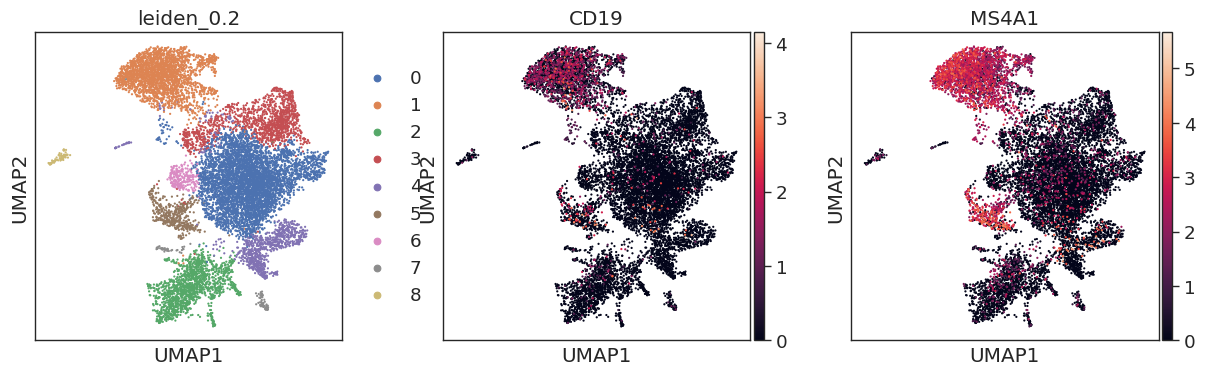

In [ ]:
#B-cells
sc.pl.umap(rna_ad, color=['leiden_0.2', 'CD19', 'MS4A1'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


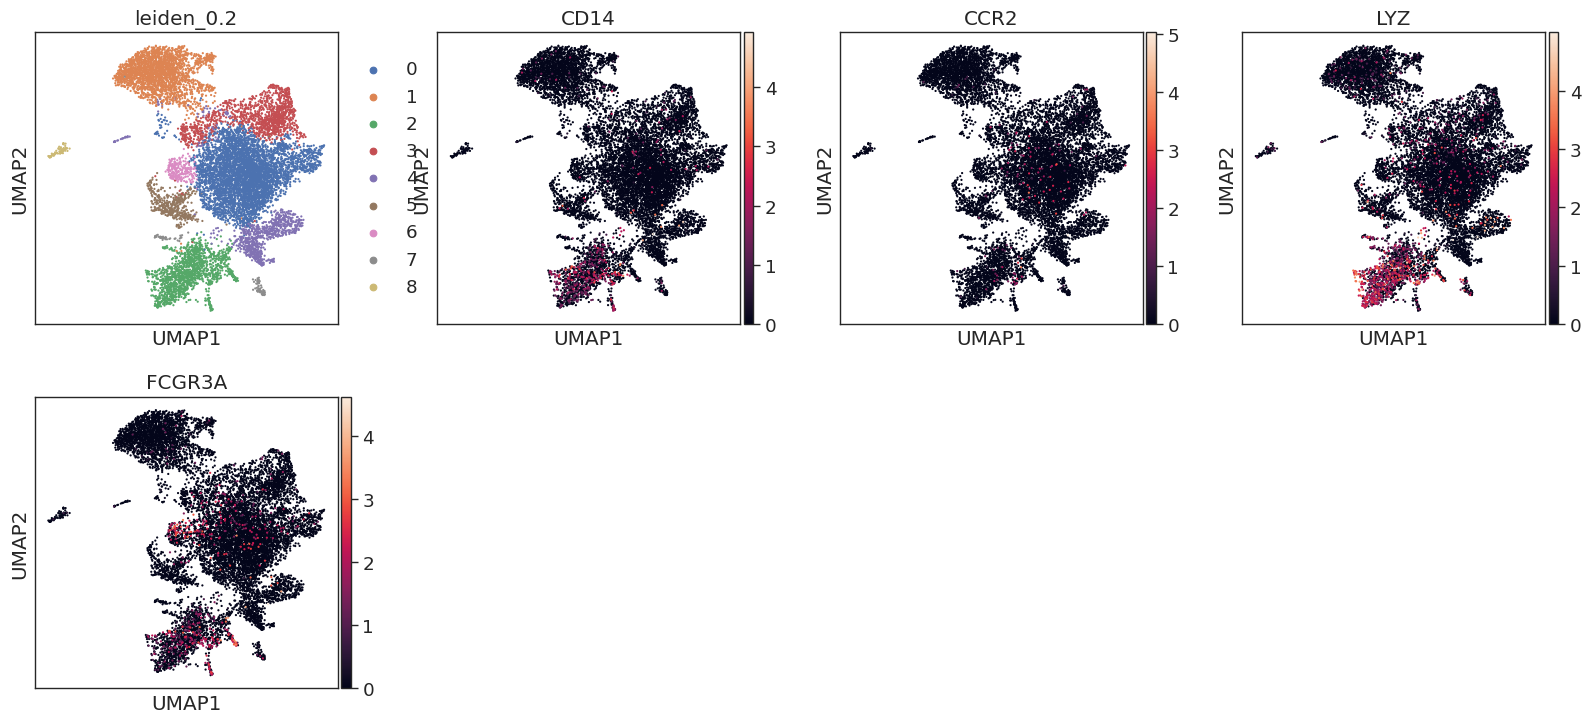

In [ ]:
#Monocytes
sc.pl.umap(rna_ad, color=['leiden_0.2', 'CD14', 'CCR2', 'LYZ', 'FCGR3A'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


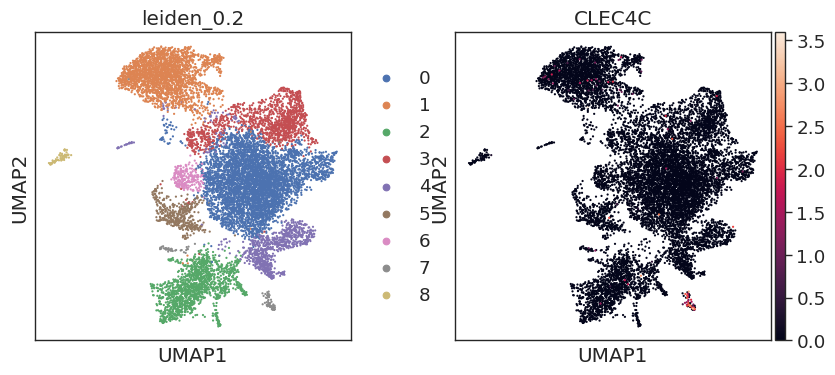

In [ ]:
#pDC
sc.pl.umap(rna_ad, color=['leiden_0.2', 'CLEC4C'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


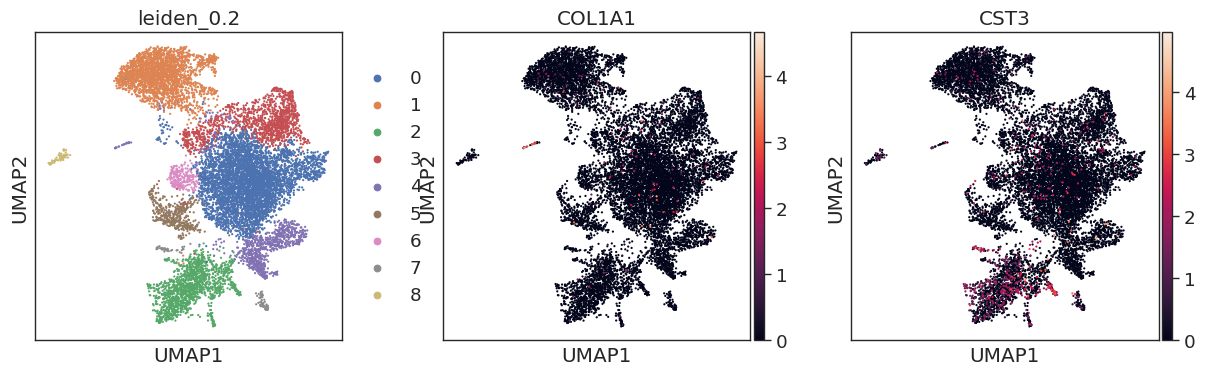

In [ ]:
#Fibroblast
sc.pl.umap(rna_ad, color=['leiden_0.2', 'COL1A1', 'CST3'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


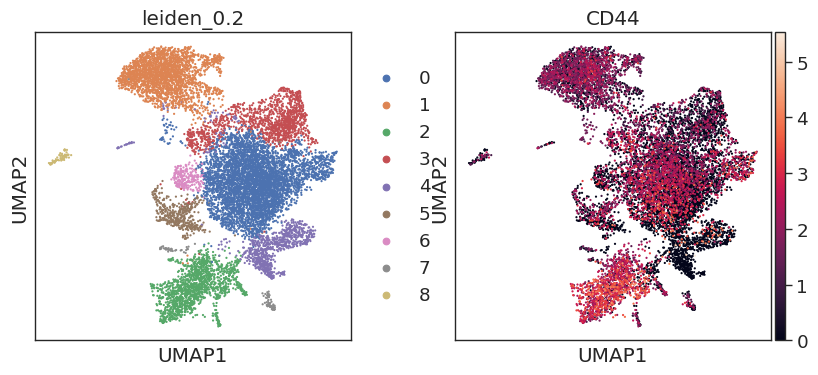

In [ ]:
#Stromal
sc.pl.umap(rna_ad, color=['leiden_0.2', 'CD44'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


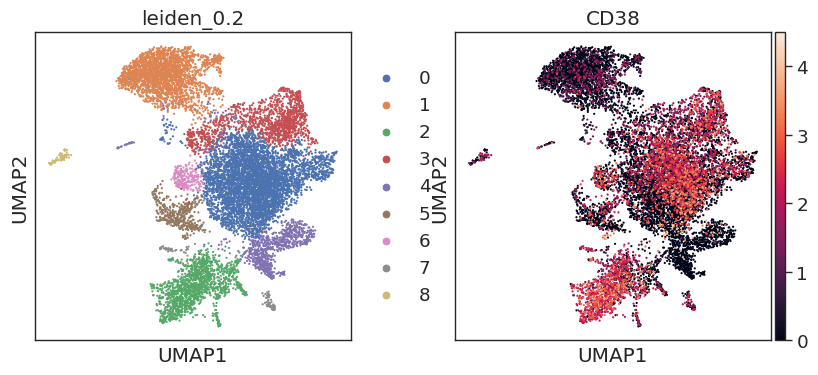

In [ ]:
#T-cycling
sc.pl.umap(rna_ad, color=['leiden_0.2', 'CD38'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


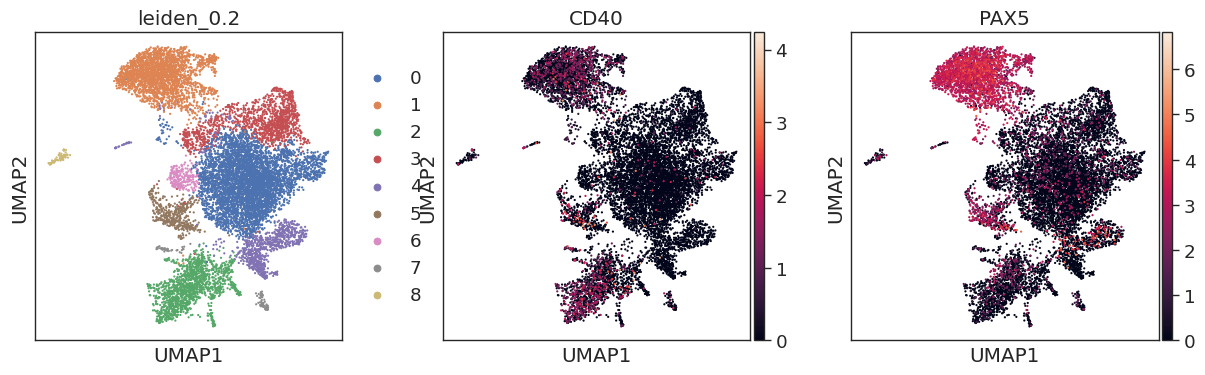

In [ ]:
#Tumor B
sc.pl.umap(rna_ad, color=['leiden_0.2', 'CD40', 'PAX5'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


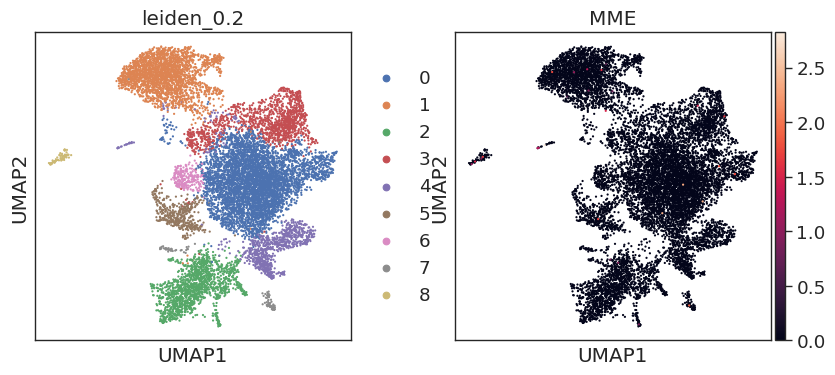

In [ ]:
#Tumor B cycling
sc.pl.umap(rna_ad, color=['leiden_0.2', 'MME'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


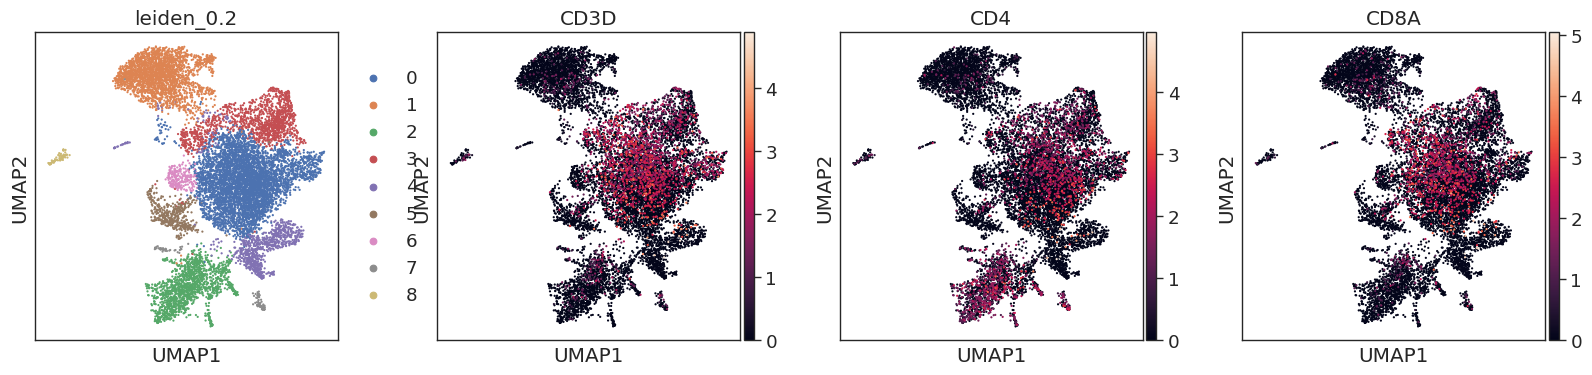

In [ ]:
#T cell
sc.pl.umap(rna_ad, color=['leiden_0.2', 'CD3D', 'CD4', 'CD8A'])

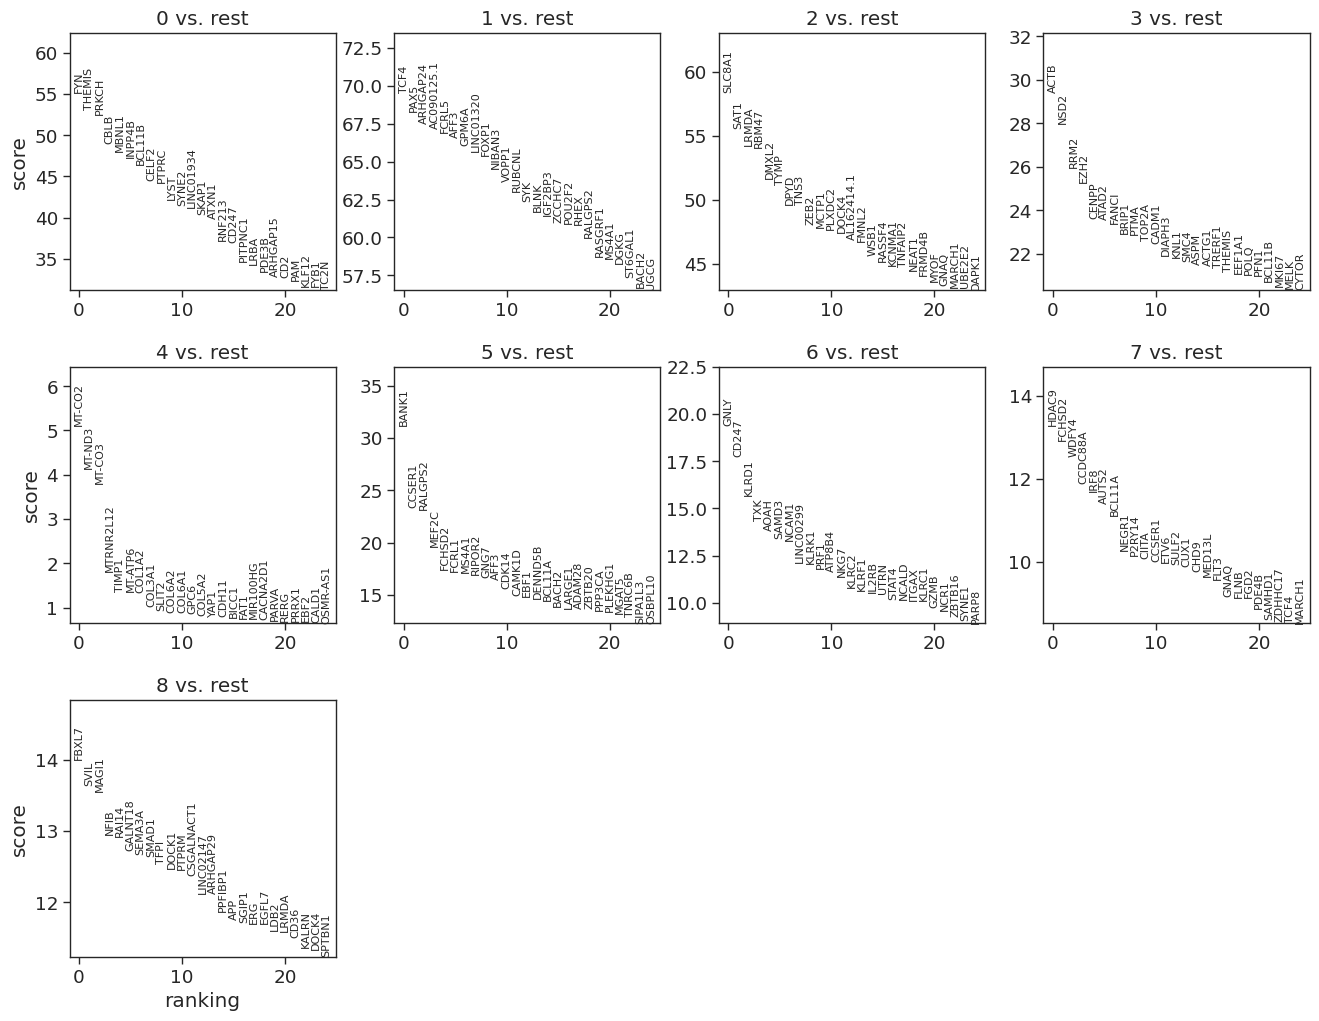

In [ ]:
sc.tl.rank_genes_groups(rna_ad, 'leiden_0.2', method='wilcoxon')
sc.pl.rank_genes_groups(rna_ad, n_genes=25, sharey=False)

In [ ]:
pd.DataFrame(rna_ad.uns['rank_genes_groups']['names']).head(15)

0           1           2       3          4        5          6  \
0         FYN        TCF4      SLC8A1    ACTB     MT-CO2    BANK1       GNLY   
1      THEMIS        PAX5        SAT1    NSD2     MT-ND3   CCSER1      CD247   
2       PRKCH    ARHGAP24       LRMDA    RRM2     MT-CO3  RALGPS2      KLRD1   
3        CBLB  AC090125.1       RBM47    EZH2  MTRNR2L12    MEF2C        TXK   
4       MBNL1       FCRL5       DMXL2   CENPP      TIMP1   FCHSD2       AOAH   
5      INPP4B        AFF3        TYMP   ATAD2    MT-ATP6    FCRL1      SAMD3   
6      BCL11B       GPM6A        DPYD   FANCI     COL1A2    MS4A1      NCAM1   
7       CELF2   LINC01320        TNS3   BRIP1     COL3A1   RIPOR2  LINC00299   
8       PTPRC       FOXP1        ZEB2    PTMA      SLIT2     GNG7      KLRK1   
9        LYST      NIBAN3       MCTP1   TOP2A     COL6A2     AFF3       PRF1   
10      SYNE2       VOPP1      PLXDC2   CADM1     COL6A1    CDK14     ATP8B4   
11  LINC01934      RUBCNL       DOCK4  DIAPH3       GPC6   CAMK1D       NKG7   
12      SKAP1         SYK  AL162414.1    KNL1     COL5A2     EBF1      KLRC2   
13      ATXN1        BLNK       FMNL2    SMC4       YAP1  DENND5B      KLRF1   
14     RNF213     IGF2BP3        WSB1    ASPM      CDH11   BCL11A      IL2RB   

          7           8  
0     HDAC9       FBXL7  
1    FCHSD2        SVIL  
2     WDFY4       MAGI1  
3   CCDC88A        NFIB  
4      IRF8       RAI14  
5     AUTS2     GALNT18  
6    BCL11A      SEMA3A  
7     NEGR1       SMAD1  
8    P2RY14        TFPI  
9     CIITA       DOCK1  
10   CCSER1       PTPRM  
11     ETV6  CSGALNACT1  
12    SULF2   LINC02147  
13     CUX1    ARHGAP29  
14     CHD9     PPFIBP1

In [ ]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'T-cell',
     '1': 'Tumor B',
     '2': 'Macrophage',
     '3': 'Stromal',
     '4': 'Fibroblast',
     '5': 'Healthy B',
     '6': 'NK',
     '7': 'pDC',
     '8': 'Mesenchymal',
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
rna_ad.obs['celltype'] = rna_ad.obs['leiden_0.2'].map(cluster2annotation).astype('category')

In [ ]:
marker_genes_dict2 = {
    'B-cell': ['MS4A1', 'CD19', 'FOXP1'],
    'Tumor-B': ['PAX5'],
    'Healthy-B': ['BANK1'],
    'pDC': ['CLEC4C'],
    'NK': ['GNLY'],
    'Fibroblast': ['TIMP1'],
    'T-cell' : ['FYN'],
    'Macrophage' : ['SAT1'],
    'Stromal' : ['EZH2'],
    'Mesenchymal' : ['ARHGAP29']
}

categories: T-cell, Tumor B, Macrophage, etc.
var_group_labels: B-cell, Tumor-B, Healthy-B, etc.


/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


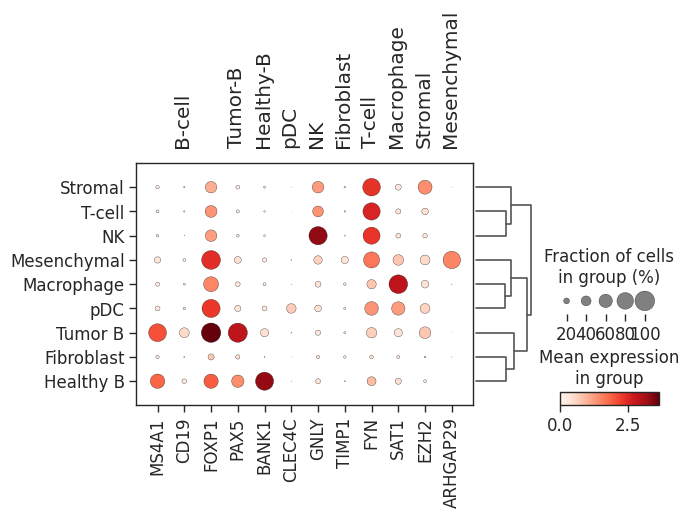

In [ ]:
sc.pl.dotplot(rna_ad, marker_genes_dict2, 'celltype', dendrogram=True)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


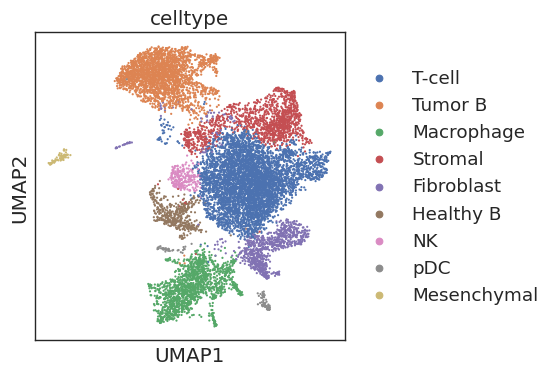

In [ ]:
sc.pl.umap(rna_ad, color=['celltype'])

In [ ]:
rna_ad.write('/content/drive/MyDrive/Genomics Project/new_rna.h5ad')

In [ ]:
rna_ad

AnnData object with n_obs × n_vars = 11926 × 4070
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.3', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_0.1_colors', 'leiden_0.15_colors', 'leiden_0.2_colors', 'leiden_0.3_colors', 'dendrogram_leiden_0.2', 'rank_genes_groups', 'dendrogram_celltype', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
atac_ad.obs

Sample  TSSEnrichment  ReadsInTSS  ReadsInPromoter  \
index                                                                   
CAGAACCGTTCACTGT-1    BCL          7.273       26606            31602   
ATTCATGAGATGCCTG-1    BCL          7.073       22315            26885   
TTGACATCAGCGCTTG-1    BCL          7.499       25822            29641   
CCTTGCGTCCTTCGTA-1    BCL          4.706       14881            21317   
CCTGCTCCAGCAAGTG-1    BCL          7.886       26507            31668   
...                   ...            ...         ...              ...   
GATTTGCAGGCTCATG-1    BCL         10.930        1126             1274   
ACCCGGTAGGACAATG-1    BCL         12.494        1060             1195   
CTAACCTGTGGGTACT-1    BCL          9.751        1364             1592   
CCAGACTCAAGTCGCT-1    BCL          9.702        1171             1304   
GTAAGCTTCTTGTCTG-1    BCL         12.855        1597             1687   

                    ReadsInBlacklist  PromoterRatio  PassQC  NucleosomeRatio  \
index                                                                          
CAGAACCGTTCACTGT-1              1153       0.158043       1         0.831184   
ATTCATGAGATGCCTG-1              1091       0.134498       1         0.990520   
TTGACATCAGCGCTTG-1              1332       0.148334       1         0.932815   
CCTTGCGTCCTTCGTA-1              1107       0.107177       1         0.838599   
CCTGCTCCAGCAAGTG-1              1170       0.160125       1         0.967861   
...                              ...            ...     ...              ...   
GATTTGCAGGCTCATG-1                44       0.219353       1         0.929568   
ACCCGGTAGGACAATG-1                30       0.205822       1         0.911126   
CTAACCTGTGGGTACT-1                26       0.274294       1         1.162444   
CCAGACTCAAGTCGCT-1                53       0.224828       1         0.987663   
GTAAGCTTCTTGTCTG-1                38       0.290762       1         0.950908   

                    nMultiFrags  nMonoFrags  nFrags  nDiFrags  BlacklistRatio  \
index                                                                           
CAGAACCGTTCACTGT-1        16487       54598   99979     28894        0.005766   
ATTCATGAGATGCCTG-1        18757       50211   99946     30978        0.005458   
TTGACATCAGCGCTTG-1        18304       51693   99913     29916        0.006666   
CCTTGCGTCCTTCGTA-1        16762       54089   99448     28597        0.005566   
CCTGCTCCAGCAAGTG-1        17333       50250   98885     31302        0.005916   
...                         ...         ...     ...       ...             ...   
GATTTGCAGGCTCATG-1          524        1505    2904       875        0.007576   
ACCCGGTAGGACAATG-1          509        1519    2903       875        0.005167   
CTAACCTGTGGGTACT-1          589        1342    2902       971        0.004480   
CCAGACTCAAGTCGCT-1          563        1459    2900       878        0.009138   
GTAAGCTTCTTGTCTG-1          504        1487    2901       910        0.006549   

                   Clusters  ReadsInPeaks      FRIP leiden      SEACell  
index                                                                    
CAGAACCGTTCACTGT-1       C6         71692  0.358722      6   SEACell-92  
ATTCATGAGATGCCTG-1       C7         64370  0.322201      6   SEACell-37  
TTGACATCAGCGCTTG-1       C4         71859  0.359665      0  SEACell-126  
CCTTGCGTCCTTCGTA-1       C4         57968  0.291463      0   SEACell-14  
CCTGCTCCAGCAAGTG-1       C6         71337  0.360798      6  SEACell-139  
...                     ...           ...       ...    ...          ...  
GATTTGCAGGCTCATG-1       C9          2540  0.437931      2  SEACell-168  
ACCCGGTAGGACAATG-1       C8          2341  0.404178      8    SEACell-5  
CTAACCTGTGGGTACT-1       C9          2852  0.491894      1  SEACell-141  
CCAGACTCAAGTCGCT-1       C9          2628  0.454357      1  SEACell-116  
GTAAGCTTCTTGTCTG-1       C9          3096  0.533977      1  SEACell-128  

[11926 rows

In [ ]:
rna_ad.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
CAGAACCGTTCACTGT-1     5362               5362       13770.0              5.0   
ATTCATGAGATGCCTG-1     4918               4918       12210.0             19.0   
TTGACATCAGCGCTTG-1     4786               4786       12650.0             31.0   
CCTTGCGTCCTTCGTA-1     2340               2340        3798.0              2.0   
CCTGCTCCAGCAAGTG-1     5037               5037       13118.0             30.0   
...                     ...                ...           ...              ...   
GATTTGCAGGCTCATG-1     1117               1117        1531.0              3.0   
ACCCGGTAGGACAATG-1     1785               1785        2881.0              7.0   
CTAACCTGTGGGTACT-1     1069               1069        1470.0              1.0   
CCAGACTCAAGTCGCT-1      596                596         752.0              1.0   
GTAAGCTTCTTGTCTG-1     1366               1366        1906.0             10.0   

                    pct_counts_mt leiden_0.1 leiden_0.15 leiden_0.2  \
CAGAACCGTTCACTGT-1       0.036311          0           0          0   
ATTCATGAGATGCCTG-1       0.155610          2           2          2   
TTGACATCAGCGCTTG-1       0.245059          1           1          1   
CCTTGCGTCCTTCGTA-1       0.052659          1           1          1   
CCTGCTCCAGCAAGTG-1       0.228693          0           0          0   
...                           ...        ...         ...        ...   
GATTTGCAGGCTCATG-1       0.195950          0           0          0   
ACCCGGTAGGACAATG-1       0.242971          3           5          5   
CTAACCTGTGGGTACT-1       0.068027          0           0          0   
CCAGACTCAAGTCGCT-1       0.132979          0           0          0   
GTAAGCTTCTTGTCTG-1       0.524659          0           0          0   

                   leiden_0.3    celltype  
CAGAACCGTTCACTGT-1          0      T-cell  
ATTCATGAGATGCCTG-1          2  Macrophage  
TTGACATCAGCGCTTG-1          1     Tumor B  
CCTTGCGTCCTTCGTA-1          1     Tumor B  
CCTGCTCCAGCAAGTG-1          7      T-cell  
...                       ...         ...  
GATTTGCAGGCTCATG-1          0      T-cell  
ACCCGGTAGGACAATG-1          6   Healthy B  
CTAACCTGTGGGTACT-1          0      T-cell  
CCAGACTCAAGTCGCT-1          0      T-cell  
GTAAGCTTCTTGTCTG-1          0      T-cell  

[11926 rows x 10 columns]

In [ ]:
atac_ad.obs['celltype'] = rna_ad.obs['celltype']
atac_ad.obs

Sample  TSSEnrichment  ReadsInTSS  ReadsInPromoter  \
index                                                                   
CAGAACCGTTCACTGT-1    BCL          7.273       26606            31602   
ATTCATGAGATGCCTG-1    BCL          7.073       22315            26885   
TTGACATCAGCGCTTG-1    BCL          7.499       25822            29641   
CCTTGCGTCCTTCGTA-1    BCL          4.706       14881            21317   
CCTGCTCCAGCAAGTG-1    BCL          7.886       26507            31668   
...                   ...            ...         ...              ...   
GATTTGCAGGCTCATG-1    BCL         10.930        1126             1274   
ACCCGGTAGGACAATG-1    BCL         12.494        1060             1195   
CTAACCTGTGGGTACT-1    BCL          9.751        1364             1592   
CCAGACTCAAGTCGCT-1    BCL          9.702        1171             1304   
GTAAGCTTCTTGTCTG-1    BCL         12.855        1597             1687   

                    ReadsInBlacklist  PromoterRatio  PassQC  NucleosomeRatio  \
index                                                                          
CAGAACCGTTCACTGT-1              1153       0.158043       1         0.831184   
ATTCATGAGATGCCTG-1              1091       0.134498       1         0.990520   
TTGACATCAGCGCTTG-1              1332       0.148334       1         0.932815   
CCTTGCGTCCTTCGTA-1              1107       0.107177       1         0.838599   
CCTGCTCCAGCAAGTG-1              1170       0.160125       1         0.967861   
...                              ...            ...     ...              ...   
GATTTGCAGGCTCATG-1                44       0.219353       1         0.929568   
ACCCGGTAGGACAATG-1                30       0.205822       1         0.911126   
CTAACCTGTGGGTACT-1                26       0.274294       1         1.162444   
CCAGACTCAAGTCGCT-1                53       0.224828       1         0.987663   
GTAAGCTTCTTGTCTG-1                38       0.290762       1         0.950908   

                    nMultiFrags  nMonoFrags  nFrags  nDiFrags  BlacklistRatio  \
index                                                                           
CAGAACCGTTCACTGT-1        16487       54598   99979     28894        0.005766   
ATTCATGAGATGCCTG-1        18757       50211   99946     30978        0.005458   
TTGACATCAGCGCTTG-1        18304       51693   99913     29916        0.006666   
CCTTGCGTCCTTCGTA-1        16762       54089   99448     28597        0.005566   
CCTGCTCCAGCAAGTG-1        17333       50250   98885     31302        0.005916   
...                         ...         ...     ...       ...             ...   
GATTTGCAGGCTCATG-1          524        1505    2904       875        0.007576   
ACCCGGTAGGACAATG-1          509        1519    2903       875        0.005167   
CTAACCTGTGGGTACT-1          589        1342    2902       971        0.004480   
CCAGACTCAAGTCGCT-1          563        1459    2900       878        0.009138   
GTAAGCTTCTTGTCTG-1          504        1487    2901       910        0.006549   

                   Clusters  ReadsInPeaks      FRIP leiden      SEACell  \
index                                                                     
CAGAACCGTTCACTGT-1       C6         71692  0.358722      6   SEACell-92   
ATTCATGAGATGCCTG-1       C7         64370  0.322201      6   SEACell-37   
TTGACATCAGCGCTTG-1       C4         71859  0.359665      0  SEACell-126   
CCTTGCGTCCTTCGTA-1       C4         57968  0.291463      0   SEACell-14   
CCTGCTCCAGCAAGTG-1       C6         71337  0.360798      6  SEACell-139   
...                     ...           ...       ...    ...          ...   
GATTTGCAGGCTCATG-1       C9          2540  0.437931      2  SEACell-168   
ACCCGGTAGGACAATG-1       C8          2341  0.404178      8    SEACell-5   
CTAACCTGTGGGTACT-1       C9          2852  0.491894      1  SEACell-141   
CCAGACTCAAGTCGCT-1       C9          2628  0.454357      1  SEACell-116   
GTAAGCTTCTTGTCTG-1       C9          3096  0.533977      1  SEACell-128   

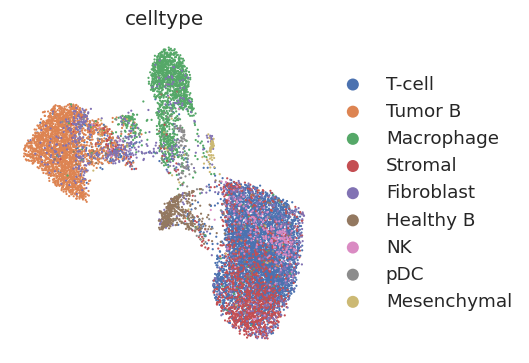

In [ ]:
sc.pl.scatter(atac_ad, basis='umap', color='celltype', frameon=False)

In [ ]:
atac_ad.write('new_atac.h5ad')

#DEG Analysis Again

In [5]:
rna_ad = sc.read('new_rna.h5ad')

In [11]:
degs = pd.DataFrame(rna_ad.uns['rank_genes_groups']['names']).head(40)

In [15]:
degs

0           1           2            3          4         5  \
0         FYN        TCF4      SLC8A1         ACTB     MT-CO2     BANK1   
1      THEMIS        PAX5        SAT1         NSD2     MT-ND3    CCSER1   
2       PRKCH    ARHGAP24       LRMDA         RRM2     MT-CO3   RALGPS2   
3        CBLB  AC090125.1       RBM47         EZH2  MTRNR2L12     MEF2C   
4       MBNL1       FCRL5       DMXL2        CENPP      TIMP1    FCHSD2   
5      INPP4B        AFF3        TYMP        ATAD2    MT-ATP6     FCRL1   
6      BCL11B       GPM6A        DPYD        FANCI     COL1A2     MS4A1   
7       CELF2   LINC01320        TNS3        BRIP1     COL3A1    RIPOR2   
8       PTPRC       FOXP1        ZEB2         PTMA      SLIT2      GNG7   
9        LYST      NIBAN3       MCTP1        TOP2A     COL6A2      AFF3   
10      SYNE2       VOPP1      PLXDC2        CADM1     COL6A1     CDK14   
11  LINC01934      RUBCNL       DOCK4       DIAPH3       GPC6    CAMK1D   
12      SKAP1         SYK  AL162414.1         KNL1     COL5A2      EBF1   
13      ATXN1        BLNK       FMNL2         SMC4       YAP1   DENND5B   
14     RNF213     IGF2BP3        WSB1         ASPM      CDH11    BCL11A   
15      CD247      ZCCHC7      RASSF4        ACTG1      BICC1     BACH2   
16    PITPNC1      POU2F2      KCNMA1       TRERF1       FAT1    LARGE1   
17       LRBA        RHEX     TNFAIP2       THEMIS   MIR100HG    ADAM28   
18      PDE3B     RALGPS2       NEAT1       EEF1A1   CACNA2D1    ZBTB20   
19   ARHGAP15     RASGRF1      FRMD4B         POLQ      PARVA    PPP3CA   
20        CD2       MS4A1        MYOF         PFN1       RERG   PLEKHG1   
21        PAM        DGKG        GNAQ       BCL11B      PRRX1     MGAT5   
22      KLF12     ST6GAL1      MARCH1        MKI67       EBF2    TNRC6B   
23       FYB1       BACH2      UBE2E2         MELK      CALD1   SIPA1L3   
24       TC2N        UGCG       DAPK1        CYTOR   OSMR-AS1   OSBPL10   
25        ITK       FCRL2        AOAH       TSPAN5      TEAD1     TPD52   
26       PAG1     ZNF804A        TFEC        COTL1      PRKG1    MARCH1   
27       ANK3        CD83       ITPR2        RPL13      PLOD2    SMCHD1   
28      PARP8     TBL1XR1       WDFY3       INPP4B    EMILIN1     WDFY4   
29      CADM1     RASGRP3        GBP1        RPL41    RUNX1T1  ARHGAP15   
30     PCED1B       SKAP2     PSTPIP2        RPLP2        TNC      IGHM   
31      HLA-A      CARD11        RGL1  MIR4435-2HG       DLC1    SEL1L3   
32     RNF19A       GRHPR        SBF2       TMSB10     COL1A1   STEAP1B   
33      ITGAL        BCL2        RTN1         RBL1       GLI3    ZCCHC7   
34    RASGRP1    KIAA1217      SAMHD1         TMPO     PDZRN3     STRBP   
35    SLFN12L  AL592429.2     ANKRD22       MMS22L   ARHGAP28      STX7   
36     TRERF1      NFATC1         LYN         TUBB      FSTL1     NCOA3   
37    PPP2R2B        IGHM        PSAP        PDE3B      DCLK1    SMIM14   
38       CD96     KHDRBS2         ABR        TIAM1     COL4A2    MALAT1   
39      PCNX2      MARCH3        CTSB         MYH9      VEGFC     AUTS2   

            6          7           8  
0        GNLY      HDAC9       FBXL7  
1       CD247     FCHSD2        SVIL  
2       KLRD1      WDFY4       MAGI1  
3         TXK    CCDC88A        NFIB  
4        AOAH       IRF8       RAI14  
5       SAMD3      AUTS2     GALNT18  
6       NCAM1     BCL11A      SEMA3A  
7   LINC00299      NEGR1       SMAD1  
8       KLRK1     P2RY14        TFPI  
9        PRF1      CIITA       DOCK1  
10     ATP8B4     CCSER1       PTPRM  
11       NKG7       ETV6  CSGALNACT1  
12      KLRC2      SULF2   LINC02147  
13      KLRF1       CUX1    ARHGAP29  
14      IL2RB       CHD9     PPFIBP1  
15       UTRN     MED13L         APP  
16      STAT4       FLT3       SGIP1  
17      NCALD       GNAQ         ERG  
18      ITGAX       FLNB       EGFL7  
19      KLRC1       FGD2        LDB2  
20       GZMB      PDE4B       LRMDA  
21       NCR1     SAMHD1        CD36  
22     ZBTB16    ZDHHC17       KALRN  


In [14]:
degs.to_csv('/content/drive/MyDrive/Genomics Project/DEGs_all.csv')

In [21]:
sc.tl.rank_genes_groups(rna_ad, groupby = 'celltype_colors', groups = ['Tumor B', 'Healthy B'], method='wilcoxon')
sc.pl.rank_genes_groups(rna_ad, n_genes=25, sharey=False)

KeyError: ignored

In [23]:
rna_ad.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
CAGAACCGTTCACTGT-1     5362               5362       13770.0              5.0   
ATTCATGAGATGCCTG-1     4918               4918       12210.0             19.0   
TTGACATCAGCGCTTG-1     4786               4786       12650.0             31.0   
CCTTGCGTCCTTCGTA-1     2340               2340        3798.0              2.0   
CCTGCTCCAGCAAGTG-1     5037               5037       13118.0             30.0   
...                     ...                ...           ...              ...   
GATTTGCAGGCTCATG-1     1117               1117        1531.0              3.0   
ACCCGGTAGGACAATG-1     1785               1785        2881.0              7.0   
CTAACCTGTGGGTACT-1     1069               1069        1470.0              1.0   
CCAGACTCAAGTCGCT-1      596                596         752.0              1.0   
GTAAGCTTCTTGTCTG-1     1366               1366        1906.0             10.0   

                    pct_counts_mt leiden_0.1 leiden_0.15 leiden_0.2  \
CAGAACCGTTCACTGT-1       0.036311          0           0          0   
ATTCATGAGATGCCTG-1       0.155610          2           2          2   
TTGACATCAGCGCTTG-1       0.245059          1           1          1   
CCTTGCGTCCTTCGTA-1       0.052659          1           1          1   
CCTGCTCCAGCAAGTG-1       0.228693          0           0          0   
...                           ...        ...         ...        ...   
GATTTGCAGGCTCATG-1       0.195950          0           0          0   
ACCCGGTAGGACAATG-1       0.242971          3           5          5   
CTAACCTGTGGGTACT-1       0.068027          0           0          0   
CCAGACTCAAGTCGCT-1       0.132979          0           0          0   
GTAAGCTTCTTGTCTG-1       0.524659          0           0          0   

                   leiden_0.3    celltype  
CAGAACCGTTCACTGT-1          0      T-cell  
ATTCATGAGATGCCTG-1          2  Macrophage  
TTGACATCAGCGCTTG-1          1     Tumor B  
CCTTGCGTCCTTCGTA-1          1     Tumor B  
CCTGCTCCAGCAAGTG-1          7      T-cell  
...                       ...         ...  
GATTTGCAGGCTCATG-1          0      T-cell  
ACCCGGTAGGACAATG-1          6   Healthy B  
CTAACCTGTGGGTACT-1          0      T-cell  
CCAGACTCAAGTCGCT-1          0      T-cell  
GTAAGCTTCTTGTCTG-1          0      T-cell  

[11926 rows x 10 columns]

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


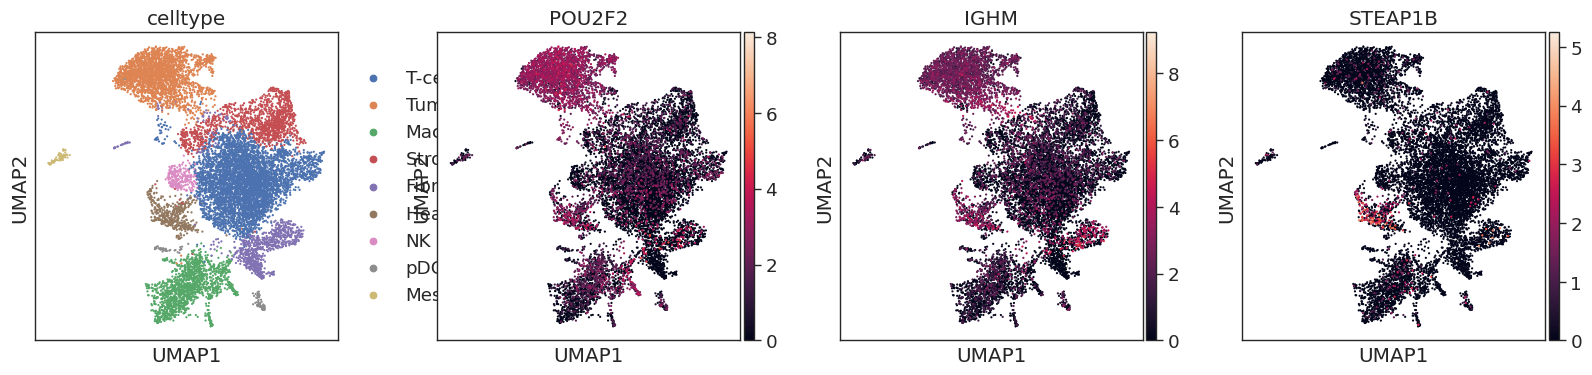

In [25]:
sc.pl.umap(rna_ad, color=['celltype', 'POU2F2', 'IGHM', 'STEAP1B'])

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


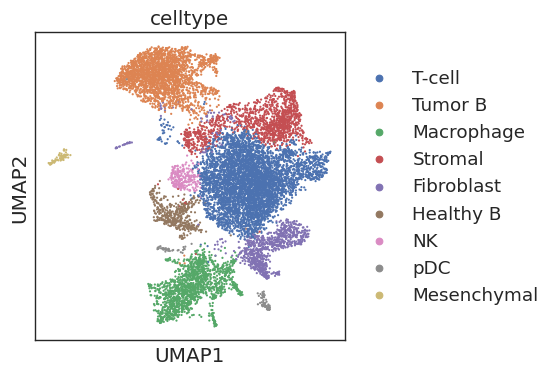

In [26]:
sc.pl.umap(rna_ad, color=['celltype'])